In [84]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions


In [85]:
filename = 'data_evaluacion.csv'
df = pd.read_csv(filename)
print (df.shape)
df.head(5)

(48841, 15)


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [86]:
df.nunique()

39                  74
State-gov            9
77516            28522
Bachelors           16
13                  16
Never-married        7
Adm-clerical        15
Not-in-family        6
White                5
Male                 2
2174               123
0                   99
40                  96
United-States       42
<=50K                2
dtype: int64

In [87]:
#Dar nombres a las columnas
nombre_columna = ['edad', 'empleador_tipo', 'peso', 'educacion', 'numero_educacion', 'estado_civil', 
                'ocupacion', 'relacion', 'raza', 'sexo', 'ganancia', 'perdida', 
                'horas_semana', 'pais_natal', 'ingresos']

df.columns=nombre_columna


In [88]:
df.nunique()

edad                   74
empleador_tipo          9
peso                28522
educacion              16
numero_educacion       16
estado_civil            7
ocupacion              15
relacion                6
raza                    5
sexo                    2
ganancia              123
perdida                99
horas_semana           96
pais_natal             42
ingresos                2
dtype: int64

In [91]:
#reemplazamos los registos ? con valores nulos
df[df == '?'] = np.nan
df.info()
# Rellenar valores nulos
for col in ['empleador_tipo', 'ocupacion', 'pais_natal']:
    mode_value = df[col].mode()[0]  
    df[col] = df[col].fillna(mode_value) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   edad              48841 non-null  int64 
 1   empleador_tipo    48841 non-null  object
 2   peso              48841 non-null  int64 
 3   educacion         48841 non-null  object
 4   numero_educacion  48841 non-null  int64 
 5   estado_civil      48841 non-null  object
 6   ocupacion         48841 non-null  object
 7   relacion          48841 non-null  object
 8   raza              48841 non-null  object
 9   sexo              48841 non-null  object
 10  ganancia          48841 non-null  int64 
 11  perdida           48841 non-null  int64 
 12  horas_semana      48841 non-null  int64 
 13  pais_natal        48841 non-null  object
 14  ingresos          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
df

,edad,empleador_tipo,peso,educacion,numero_educacion,estado_civil,ocupacion,relacion,raza,sexo,ganancia,perdida,horas_semana,pais_natal,ingresos
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48837,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
48838,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48839,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [8]:
#Dividir las variables x y y
x = df.drop(columns='ingresos', axis=1)
y = df['ingresos']

In [67]:
# Definir características numéricas y categóricas
numeric_features = ['edad', 'peso', 'numero_educacion', 'ganancia', 'perdida', 'horas_semana']
categorical_features = ['empleador_tipo', 'educacion', 'estado_civil', 'ocupacion', 'relacion',
                        'raza', 'sexo', 'pais_natal']

In [ ]:
# Crear el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [ ]:
# Crear el pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC(kernel='linear'))])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   edad              48841 non-null  int64 
 1   empleador_tipo    48841 non-null  object
 2   peso              48841 non-null  int64 
 3   educacion         48841 non-null  object
 4   numero_educacion  48841 non-null  int64 
 5   estado_civil      48841 non-null  object
 6   ocupacion         48841 non-null  object
 7   relacion          48841 non-null  object
 8   raza              48841 non-null  object
 9   sexo              48841 non-null  object
 10  ganancia          48841 non-null  int64 
 11  perdida           48841 non-null  int64 
 12  horas_semana      48841 non-null  int64 
 13  pais_natal        48841 non-null  object
 14  ingresos          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [92]:
#Dividir en daos de prueba y entrenamiento
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1,  stratify=y)

In [68]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['edad', 'peso',
                                                   'numero_educacion',
                                                   'ganancia', 'perdida',
                                                   'horas_semana']),
                                                 ('cat', OneHotEncoder(),
                                                  ['empleador_tipo',
                                                   'educacion', 'estado_civil',
                                                   'ocupacion', 'relacion',
                                                   'raza', 'sexo',
                                                   'pais_natal'])])),
                ('classifier', SVC(kernel='linear'))])

In [14]:
# Realizar predicciones
y_pred = pipeline.predict(x_test)

In [15]:
# Evaluar el modelo
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91     11147
        >50K       0.76      0.60      0.67      3506

    accuracy                           0.86     14653
   macro avg       0.82      0.77      0.79     14653
weighted avg       0.85      0.86      0.85     14653

Accuracy: 0.8586637548624855


In [97]:
cm = confusion_matrix(y_test, y_pred)

<Figure size 5000x2000 with 0 Axes>

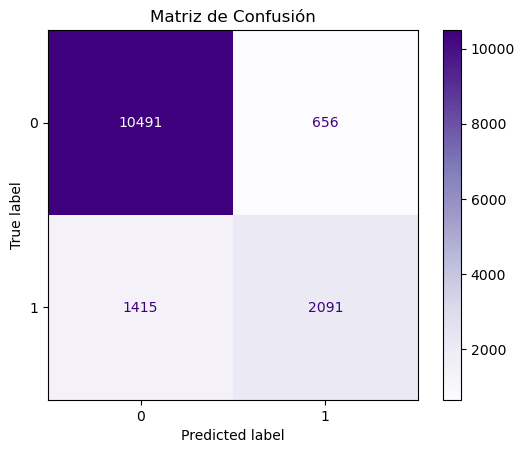

In [98]:
import matplotlib.ticker as ticker
plt.figure(figsize=(50, 20))  
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Purples, values_format='d') 
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Matriz de Confusión')
plt.show()

In [107]:
# Evalaucion del modelo
y_pred=pipeline.predict(x_test)
print('Train Accuracy : %.5f' % pipeline.score(x_train, y_train))
print('Test Accuracy : %.5f' % pipeline.score(x_test, y_test))
print("Precisión del modelo:", accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Train Accuracy : 0.84927
Test Accuracy : 0.85866
Precisión del modelo: 0.8586637548624855
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91     11147
        >50K       0.76      0.60      0.67      3506

    accuracy                           0.86     14653
   macro avg       0.82      0.77      0.79     14653
weighted avg       0.85      0.86      0.85     14653



In [17]:
# Crear el pipeline
pipeline2 = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC(kernel='rbf'))])

In [18]:
pipeline2.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['edad', 'peso',
                                                   'numero_educacion',
                                                   'ganancia', 'perdida',
                                                   'horas_semana']),
                                                 ('cat', OneHotEncoder(),
                                                  ['empleador_tipo',
                                                   'educacion', 'estado_civil',
                                                   'ocupacion', 'relacion',
                                                   'raza', 'sexo',
                                                   'pais_natal'])])),
                ('classifier', SVC())])

In [19]:
# Realizar predicciones
y_pred2 = pipeline2.predict(x_test)

In [20]:
# Evaluar el modelo
print(classification_report(y_test, y_pred2))
print(f"Accuracy: {accuracy_score(y_test, y_pred2)}")


              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91     11147
        >50K       0.78      0.60      0.68      3506

    accuracy                           0.86     14653
   macro avg       0.83      0.77      0.80     14653
weighted avg       0.86      0.86      0.86     14653

Accuracy: 0.8635774244182078


<Figure size 5000x2000 with 0 Axes>

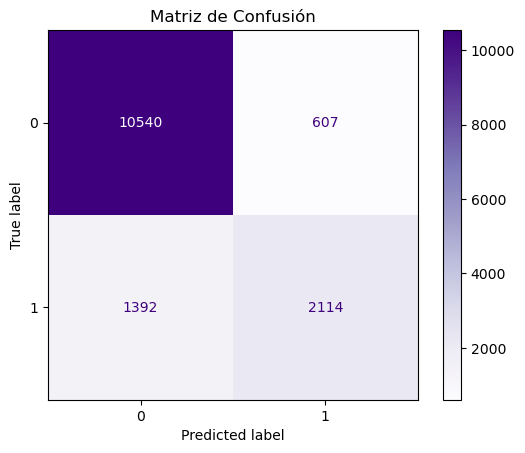

In [99]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred2)
import matplotlib.ticker as ticker
plt.figure(figsize=(50, 20))  
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Purples, values_format='d') 
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Matriz de Confusión')
plt.show()

In [108]:
# Evalaucion del modelo
y_pred=pipeline2.predict(x_test)
print('Train Accuracy : %.5f' % pipeline2.score(x_train, y_train))
print('Test Accuracy : %.5f' % pipeline2.score(x_test, y_test))
print("Precisión del modelo:", accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Train Accuracy : 0.86308
Test Accuracy : 0.86358
Precisión del modelo: 0.8635774244182078
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91     11147
        >50K       0.78      0.60      0.68      3506

    accuracy                           0.86     14653
   macro avg       0.83      0.77      0.80     14653
weighted avg       0.86      0.86      0.86     14653



In [37]:
conf_matrix = confusion_matrix(y_test, y_pred2)
conf_matrix

array([[10540,   607],
       [ 1392,  2114]], dtype=int64)

In [22]:
# Crear el pipeline
pipeline3 = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC(kernel='poly'))])

In [23]:
pipeline3.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['edad', 'peso',
                                                   'numero_educacion',
                                                   'ganancia', 'perdida',
                                                   'horas_semana']),
                                                 ('cat', OneHotEncoder(),
                                                  ['empleador_tipo',
                                                   'educacion', 'estado_civil',
                                                   'ocupacion', 'relacion',
                                                   'raza', 'sexo',
                                                   'pais_natal'])])),
                ('classifier', SVC(kernel='poly'))])

In [24]:
# Realizar predicciones
y_pred3 = pipeline3.predict(x_test)

In [25]:
# Evaluar el modelo
print(classification_report(y_test, y_pred3))
print(f"Accuracy: {accuracy_score(y_test, y_pred3)}")


              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91     11147
        >50K       0.77      0.60      0.67      3506

    accuracy                           0.86     14653
   macro avg       0.83      0.77      0.79     14653
weighted avg       0.85      0.86      0.85     14653

Accuracy: 0.8607111171773698


<Figure size 5000x2000 with 0 Axes>

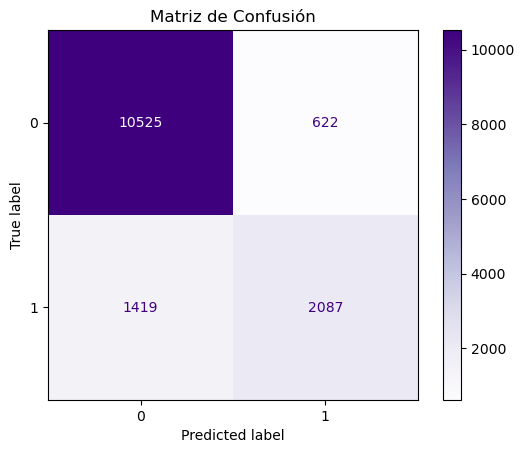

In [100]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred3)
import matplotlib.ticker as ticker
plt.figure(figsize=(50, 20))  
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Purples, values_format='d') 
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Matriz de Confusión')
plt.show()

In [109]:
# Evalaucion del modelo
y_pred=pipeline3.predict(x_test)
print('Train Accuracy : %.5f' % pipeline3.score(x_train, y_train))
print('Test Accuracy : %.5f' % pipeline3.score(x_test, y_test))
print("Precisión del modelo:", accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Train Accuracy : 0.86513
Test Accuracy : 0.86071
Precisión del modelo: 0.8607111171773698
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91     11147
        >50K       0.77      0.60      0.67      3506

    accuracy                           0.86     14653
   macro avg       0.83      0.77      0.79     14653
weighted avg       0.85      0.86      0.85     14653



In [39]:
conf_matrix = confusion_matrix(y_test, y_pred3)
conf_matrix

array([[10525,   622],
       [ 1419,  2087]], dtype=int64)

In [27]:
# Crear el pipeline
pipeline4 = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC(kernel='sigmoid'))])

In [28]:
pipeline4.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['edad', 'peso',
                                                   'numero_educacion',
                                                   'ganancia', 'perdida',
                                                   'horas_semana']),
                                                 ('cat', OneHotEncoder(),
                                                  ['empleador_tipo',
                                                   'educacion', 'estado_civil',
                                                   'ocupacion', 'relacion',
                                                   'raza', 'sexo',
                                                   'pais_natal'])])),
                ('classifier', SVC(kernel='sigmoid'))])

In [29]:
# Realizar predicciones
y_pred4 = pipeline4.predict(x_test)

In [30]:
# Evaluar el modelo
print(classification_report(y_test, y_pred4))
print(f"Accuracy: {accuracy_score(y_test, y_pred4)}")


              precision    recall  f1-score   support

       <=50K       0.85      0.86      0.85     11147
        >50K       0.54      0.52      0.53      3506

    accuracy                           0.78     14653
   macro avg       0.69      0.69      0.69     14653
weighted avg       0.78      0.78      0.78     14653

Accuracy: 0.7779976796560432


<Figure size 5000x2000 with 0 Axes>

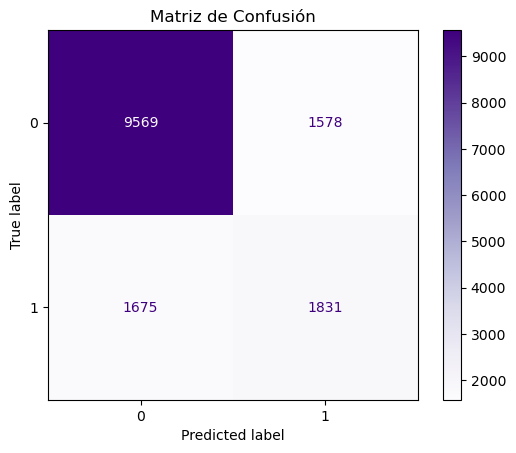

In [101]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred4)
import matplotlib.ticker as ticker
plt.figure(figsize=(50, 20))  
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Purples, values_format='d') 
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Matriz de Confusión')
plt.show()

In [110]:
# Evalaucion del modelo
y_pred=pipeline4.predict(x_test)
print('Train Accuracy : %.5f' % pipeline4.score(x_train, y_train))
print('Test Accuracy : %.5f' % pipeline4.score(x_test, y_test))
print("Precisión del modelo:", accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Train Accuracy : 0.77208
Test Accuracy : 0.77800
Precisión del modelo: 0.7779976796560432
              precision    recall  f1-score   support

       <=50K       0.85      0.86      0.85     11147
        >50K       0.54      0.52      0.53      3506

    accuracy                           0.78     14653
   macro avg       0.69      0.69      0.69     14653
weighted avg       0.78      0.78      0.78     14653



In [40]:
conf_matrix = confusion_matrix(y_test, y_pred4)
conf_matrix

array([[9569, 1578],
       [1675, 1831]], dtype=int64)

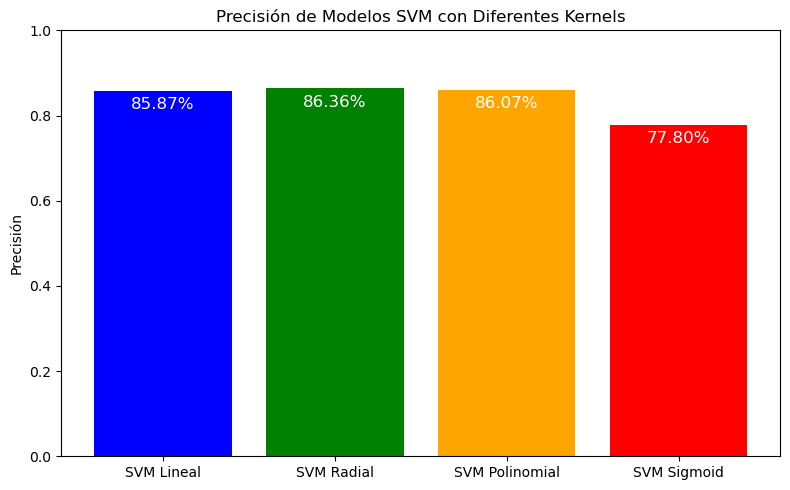

In [33]:
#Graficar la precicion de los modelos con los cuatro kernel
accuracy_scores = [accuracy_score(y_test, y_pred),  accuracy_score(y_test, y_pred2), accuracy_score(y_test, y_pred3),  accuracy_score(y_test, y_pred4)]
labels = ['SVM Lineal', 'SVM Radial', 'SVM Polinomial', 'SVM Sigmoid']
plt.figure(figsize=(8, 5))
colors = ['blue', 'green', 'orange', 'red']
bars = plt.bar(labels, accuracy_scores, color=colors)
for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() - 0.05, 
             f'{score:.2%}', 
             ha='center', 
             va='bottom', 
             color='white', 
             fontsize=12)

plt.ylim(0, 1)
plt.ylabel('Precisión')
plt.title('Precisión de Modelos SVM con Diferentes Kernels')
plt.tight_layout()
plt.show()

## Bibliografias
### Ejemplo con SVM | Interactive Chaos. (n.d.). https://interactivechaos.com/es/manual/tutorial-de-machine-learning/ejemplo-con-svm